In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

These scripts generate the graphics presented in our paper. The csv files for the execution are available in RQ3/*.csv in data folder. 

In [71]:
same_pr_issues_df = pd.read_csv('./issues_same_pr_aware.csv')
diff_pr_issues_df = pd.read_csv('./issues_diff_pr_aware.csv')

same_labeled = same_pr_issues_df.copy()
same_labeled['origin'] = 'Issue a & Issue b are solved in the same PR'
diff_labeled = diff_pr_issues_df.copy()
diff_labeled['origin'] = 'Issue a & Issue b are solved in different PRs'

combined_issues_df = pd.concat([same_labeled, diff_labeled], ignore_index=True)

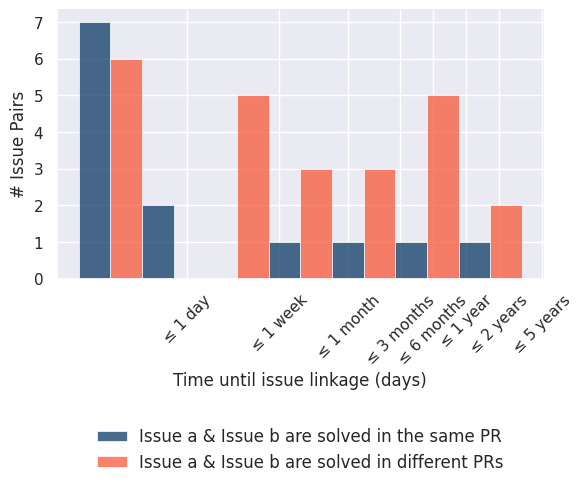

In [ ]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(6,6))
sns.despine(f)
colors = ["#0d3b66", "#f95738"]

sns.histplot(
    combined_issues_df,
    x="time distance", hue="origin",
    multiple="dodge",
    linewidth=.5,
    log_scale=True,
    legend=True,
    palette=colors
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 7, 30, 90, 180, 365, 730, 1825])
ax.tick_params(axis="x", rotation=45)
ax.set_xticklabels([
    "≤ 1 day",
    "≤ 1 week",
    "≤ 1 month",
    "≤ 3 months",
    "≤ 6 months",
    "≤ 1 year",
    "≤ 2 years", 
    "≤ 5 years"
], fontsize=11)

ax.set_xlabel("Time until issue linkage (days)", fontsize=12)
ax.set_ylabel("# Issue Pairs", fontsize=12)


leg = ax.get_legend()
leg.set_bbox_to_anchor((0.5, -0.5))
leg.set_loc("upper center")
leg.set_title(None)
leg.set_frame_on(False)

for text in leg.get_texts():
    text.set_fontsize(12)

plt.tight_layout()
plt.savefig("issues_linkage.pdf", bbox_inches="tight", dpi=300)

In [76]:
same_issue_prs_df = pd.read_csv('./pr_same_issue_aware.csv')
diff_issue_prs_paw_df = pd.read_csv('./pr_diff_issue_aware_pr.csv')
diff_issue_prs_iaw_df = pd.read_csv('./pr_diff_issue_aware_issue.csv')

same_issue_prs_df['origin'] = 'PR a & PR b solve the same issue'
diff_issue_prs_paw_df['origin'] = 'PR a & PR b solve different issues (linkage in PR description)'
diff_issue_prs_iaw_df['origin'] = 'PR a & PR b solve different issues (linkage in related issues)'

combined_prs_df = pd.concat([same_issue_prs_df, diff_issue_prs_paw_df, diff_issue_prs_iaw_df], ignore_index=True)

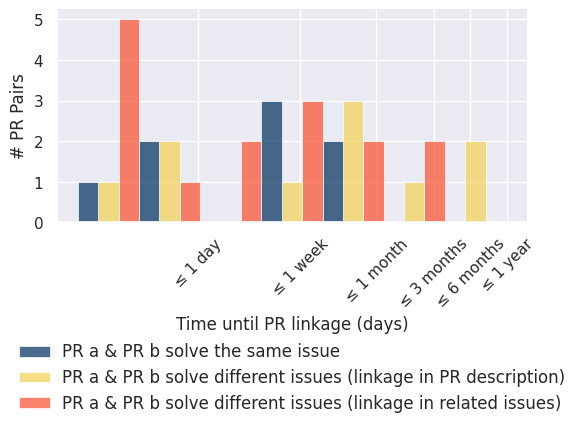

In [66]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(6,5.5))
sns.despine(f)
colors = ["#0d3b66", "#f4d35e", "#f95738"]

sns.histplot(
    combined_prs_df,
    x="time distance", hue="origin",
    multiple="dodge",
    linewidth=.5,
    log_scale=True,
    legend=True,
    palette=colors
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 7, 30, 90, 180, 365])
ax.tick_params(axis="x", rotation=45)
ax.set_xticklabels([
    "≤ 1 day",
    "≤ 1 week",
    "≤ 1 month",
    "≤ 3 months",
    "≤ 6 months", 
    "≤ 1 year"
], fontsize=11)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("Time until PR linkage (days)", fontsize=12)
ax.set_ylabel("# PR Pairs", fontsize=12)


leg = ax.get_legend()
leg.set_bbox_to_anchor((0.5, -0.5))
leg.set_loc("upper center")
leg.set_title(None)
leg.set_frame_on(False)

for text in leg.get_texts():
    text.set_fontsize(12)

plt.tight_layout()
plt.savefig("prs_linkage.pdf", bbox_inches="tight", dpi=300)